**CLUSTERING**

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


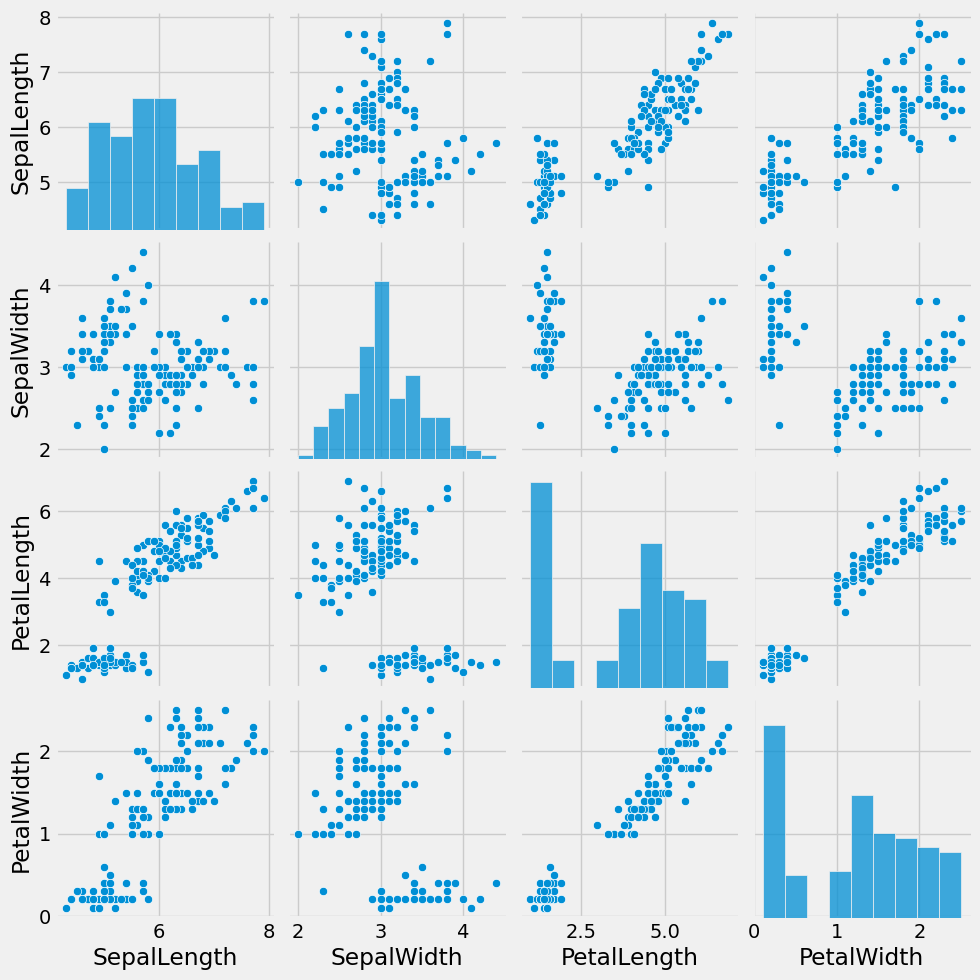

In [4]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [5]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [6]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [7]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [8]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.6294675561906644

In [9]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

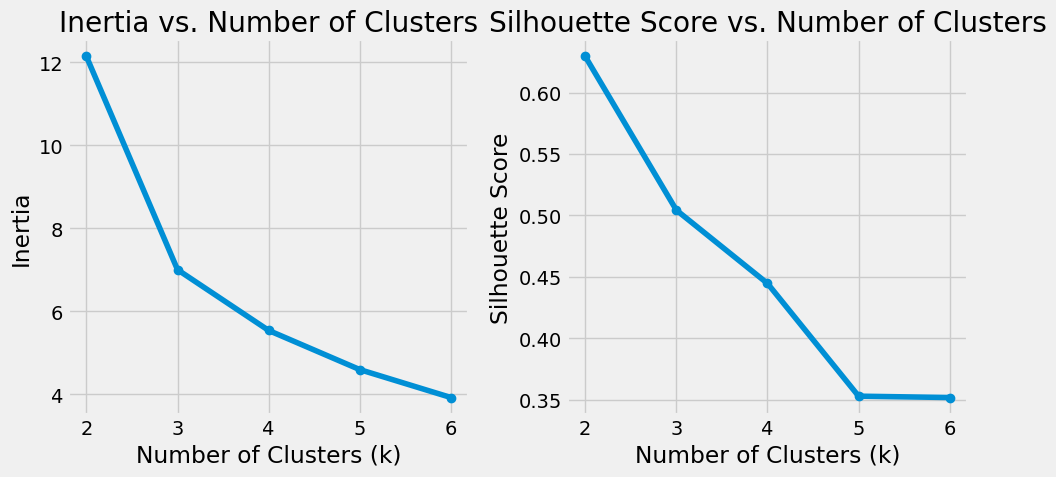

In [10]:
# Define a range of k values
k_values = [2, 3, 4, 5, 6]

inertia_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    silhouette = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)

# Plotting the inertia and silhouette scores for different k values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.tight_layout()
plt.show()


- Inertia decreases as k increases because more clusters mean smaller distances to centroids.
- Not scaling features might affect the clustering results. Scaling ensures that all features contribute equally, preventing biases towards features with larger scales.
- There isn't a definitive right k. It depends on the context.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

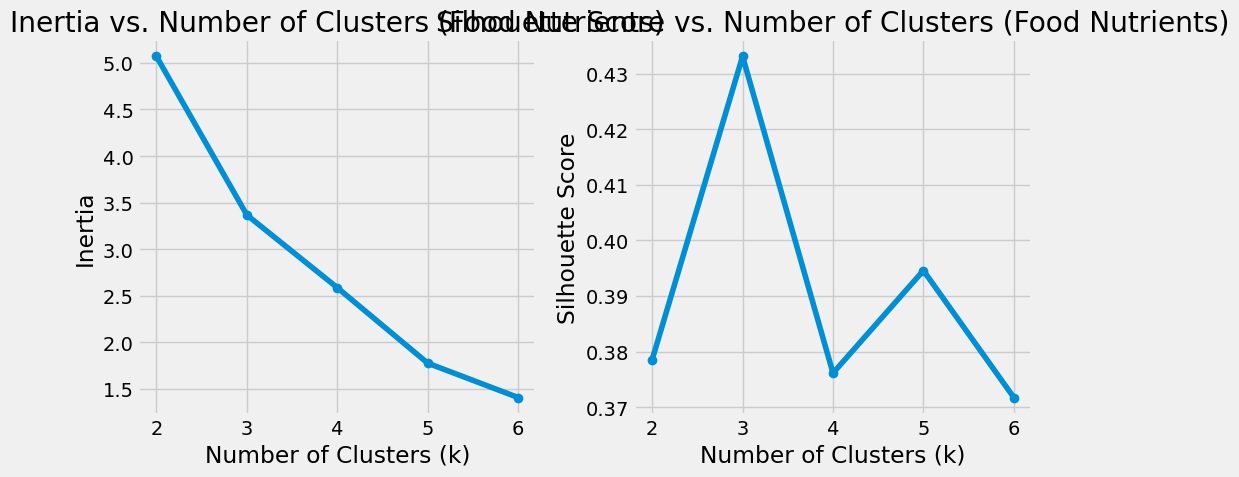

In [23]:

food_df = pd.read_excel("food_n.xlsx")

food_df.head()

food_cols = food_df.columns[1:]

X_food_scaled = preprocessing.MinMaxScaler().fit_transform(food_df[food_cols])

k_values_food = [2, 3, 4, 5, 6]

inertia_scores_food = []
silhouette_scores_food = []

for k_food in k_values_food:
    kmeans_food = cluster.KMeans(n_clusters=k_food)
    kmeans_food.fit(X_food_scaled)
    
    labels_food = kmeans_food.labels_
    inertia_food = kmeans_food.inertia_
    silhouette_food = metrics.silhouette_score(X_food_scaled, labels_food, metric='euclidean')
    
    inertia_scores_food.append(inertia_food)
    silhouette_scores_food.append(silhouette_food)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values_food, inertia_scores_food, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters (Food Nutrients)')

plt.subplot(1, 2, 2)
plt.plot(k_values_food, silhouette_scores_food, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Food Nutrients)')

plt.tight_layout()
plt.show()

**LOGISTIC REGRESSION**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [16]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [17]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

In [19]:
glass.sort_values( by = 'Al', inplace=True)

Different threshold values for column 'Al'

In [20]:
thresholds = [0.3, 0.4, 0.6, 0.7]

for threshold in thresholds:
    custom_pred = (logreg.predict_proba(X)[:,1] >= threshold).astype(int)
    accuracy = accuracy_score(y, custom_pred)
    precision = precision_score(y, custom_pred)
    recall = recall_score(y, custom_pred)
    
    print(f"Threshold: {threshold}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Threshold: 0.3, Accuracy: 0.8644859813084113, Precision: 0.72, Recall: 0.7058823529411765
Threshold: 0.4, Accuracy: 0.8785046728971962, Precision: 0.8205128205128205, Recall: 0.6274509803921569
Threshold: 0.6, Accuracy: 0.8411214953271028, Precision: 0.8695652173913043, Recall: 0.39215686274509803
Threshold: 0.7, Accuracy: 0.8364485981308412, Precision: 1.0, Recall: 0.3137254901960784


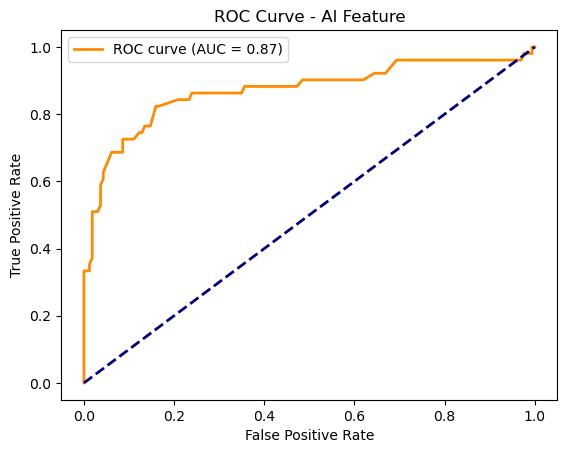

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_al, tpr_al, thresholds_al = roc_curve(y, logreg.predict_proba(X)[:,1])
roc_auc_al = roc_auc_score(y, logreg.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr_al, tpr_al, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_al:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Al Feature')
plt.legend()
plt.show()